### "Drink because you are happy, but never because you are miserable" 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from IPython.core.display import HTML

In [40]:
display(HTML("<img src='https://mygenes.co.il/wp-content/uploads/2020/09/shutterstock_1376048102-1.jpg'/>"))

#### The Dataset:
The dataset contains information on countries that rank their level of happiness through various data such as HDI, gross domestic product (GDP) and types of alcohol.
[link to the data source](https://www.kaggle.com/marcospessotto/happiness-and-alcohol-consumption)

We read the data from a github repository:

In [41]:
alcohol_df = pd.read_csv('https://raw.githubusercontent.com/shahafmalka13/DS_PROJECT/main/HappinessAlcoholConsumption.csv.csv')
alcohol_df

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19


## 1. Wrangling the data:

- Treat data types (if needed)
- Treat missing values (if needed)
- Treat column names (if needed)

- Treat any other weird thing your data might have



we check the data types-

In [4]:
alcohol_df.dtypes

Country              object
Region               object
Hemisphere           object
HappinessScore      float64
HDI                   int64
GDP_PerCapita       float64
Beer_PerCapita        int64
Spirit_PerCapita      int64
Wine_PerCapita        int64
dtype: object

Check if there are missing values-

In [5]:
alcohol_df.isnull().sum().sort_values()

Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
GDP_PerCapita       0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
dtype: int64

## 2. Understanding the data


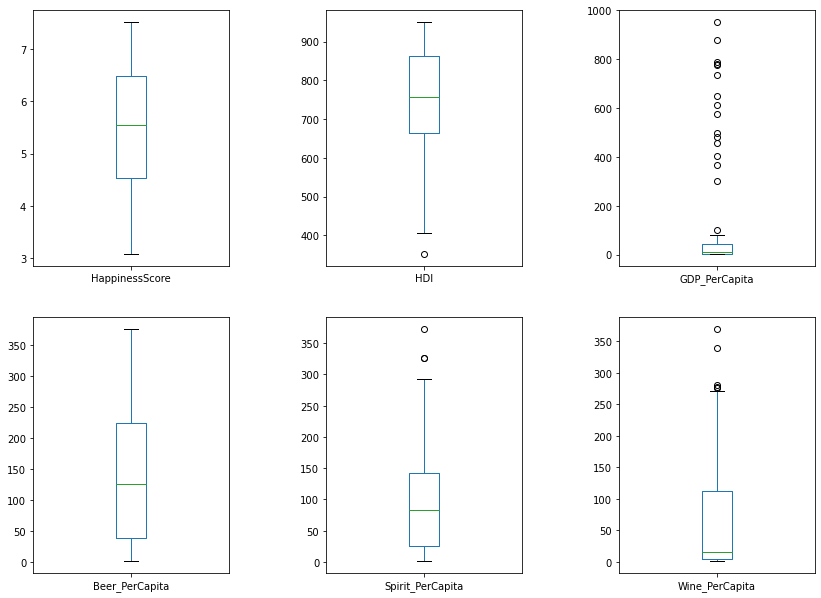

In [6]:
alcohol_df.plot(subplots = True , layout =(3,3) , kind ='box', figsize = (14,16), patch_artist = False)
plt.subplots_adjust(wspace=0.5)

GDP- It can be clearly seen that many data are not in the relevant field and therefore we have chosen to present in another way.

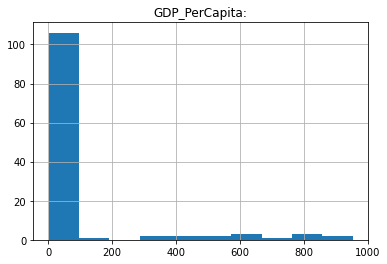

In [7]:
plt.title('GDP_PerCapita:')
alcohol_df['GDP_PerCapita'].hist();

- It can be noted that there are several anomalies in the data but these anomalies are not problematic because it is indeed possible that the gross national product in one country is significantly higher than in the other countries, as well as the consumption of wine or beer in one country is significantly different from another.
  According to state production capacity / demand / supply

In [8]:
alcohol_df.pivot_table(['Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita' ],'Region') 

,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
Region,,,
Australia and New Zealand,232.000000,75.500000,193.500000
Central and Eastern Europe,170.074074,171.777778,83.814815
Eastern Asia,93.250000,149.750000,10.250000
Latin America and Caribbean,159.478261,109.913043,35.782609
Middle East and Northern Africa,24.818182,41.363636,10.363636
North America,244.500000,140.000000,92.000000
Southeastern Asia,79.600000,104.600000,3.000000
Sub-Saharan Africa,78.464286,20.750000,12.214286
Western Europe,216.450000,101.500000,197.800000


#### findings:
- It seems that in the provinces characterized by developing or Muslim countries the level of alcohol consumption is relatively low compared to the developed countries

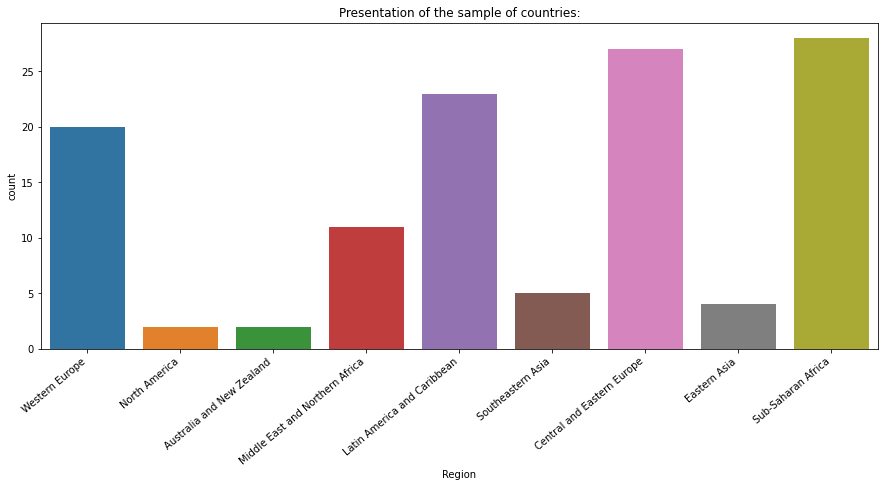

In [9]:
plt.figure(figsize=(15,6))
plt.title('Presentation of the sample of countries:')
plot1 = sns.countplot(x="Region", data=alcohol_df);
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=40, ha="right");


- It can be seen that the sample presented in the data reliably represents the distribution and division of countries into regions in the world.

In [10]:
alcohol_df["Total_alcohol"] = alcohol_df['Beer_PerCapita'] + alcohol_df['Spirit_PerCapita'] + alcohol_df['Wine_PerCapita']
alcohol_df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Total_alcohol
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,565
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,372
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,369
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,493


In [11]:
alcohol_groupd = alcohol_df.groupby('Country')[['HappinessScore', 'Total_alcohol']].max()
groupH = alcohol_groupd.sort_values('HappinessScore',ascending = False).reset_index()
groupH

,Country,HappinessScore,Total_alcohol
0,Denmark,7.526,583
1,Switzerland,7.509,565
2,Iceland,7.501,372
3,Norway,7.498,369
4,Finland,7.413,493
...,...,...,...
117,Tanzania,3.666,43
118,Liberia,3.622,173
119,Benin,3.484,51
120,Togo,3.303,57


In [12]:
alcohol_groupd = alcohol_df.groupby('Country')[['HappinessScore', 'Total_alcohol']].max()
groupT = alcohol_groupd.sort_values('Total_alcohol',ascending = False).reset_index()
groupT

,Country,HappinessScore,Total_alcohol
0,Czech Republic,6.596,665
1,France,6.478,648
2,Russian Federation,5.856,646
3,Lithuania,5.813,643
4,Luxembourg,6.871,640
...,...,...,...
117,Senegal,4.219,17
118,Egypt,4.362,11
119,Mali,4.073,7
120,Niger,3.856,6


In [13]:
countries = groupT['Country']

In [14]:
diff=[]
for country in countries:
    c1 = int(groupT[groupT['Country'] == country].index[0])
    c2 = int(groupH[groupH['Country'] == country].index[0])
    diff+=[abs(c1-c2)]
mean = np.mean(diff)
mean

26.78688524590164

##### findings:
- It can be seen that the happiest country is not necessarily the country with the highest alcohol consumption.
- It can be seen that there is indeed a connection between the level of alcohol and happiness.
- With the help of the function we built it can be seen that the sorting is not completely random.

In [15]:
corr_prep = alcohol_df[['HappinessScore','Total_alcohol']]
corr_prep.corr(method = 'spearman')

,HappinessScore,Total_alcohol
HappinessScore,1.000000,0.554812
Total_alcohol,0.554812,1.000000


We chose to use Spearman's correlation because the other methods give a lower correlation. (unit 5)

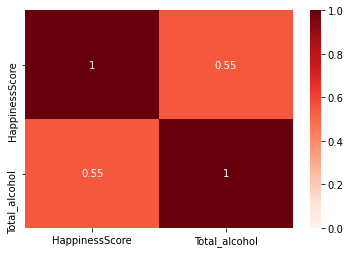

In [16]:
sns.heatmap(corr_prep.corr(), vmin=0.0 , vmax = 1,cmap='Reds' , annot=True);

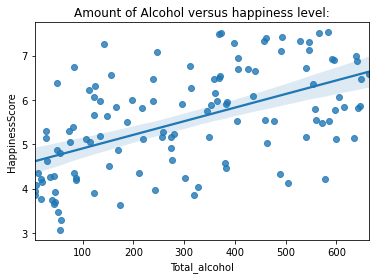

In [17]:
plt.title('Amount of Alcohol versus happiness level:')
sns.regplot(x='Total_alcohol', y='HappinessScore', data=corr_prep);

##### findings:

- The correlation between happiness level and overall alcohol consumption is moderate. This medium relationship can be explained by a number of explanations:
- It is natural to think that in countries where people drink more the population is happier (celebrating more) but it is possible that in countries where people drink more it is the population that is obligated to alcohol addictions, ie a population with bigger problems.

checking the correlation between types of alcohol with happines- 

In [18]:
spc_corr = alcohol_df[['HappinessScore','Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita']].corr(method = 'spearman')
spc_corr

,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.525883,0.371074,0.470146
Beer_PerCapita,0.525883,1.000000,0.463499,0.601451
Spirit_PerCapita,0.371074,0.463499,1.000000,0.342377
Wine_PerCapita,0.470146,0.601451,0.342377,1.000000


In [19]:
spc_corr.style.background_gradient(cmap='Blues')

,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.525883,0.371074,0.470146
Beer_PerCapita,0.525883,1.000000,0.463499,0.601451
Spirit_PerCapita,0.371074,0.463499,1.000000,0.342377
Wine_PerCapita,0.470146,0.601451,0.342377,1.000000


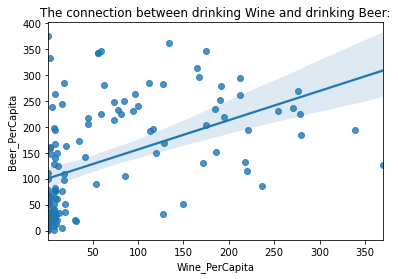

In [20]:
plt.title('The connection between drinking Wine and drinking Beer:')
sns.regplot(x='Wine_PerCapita', y='Beer_PerCapita', data=alcohol_df);

##### findings:

- we can see that the relationship between beer and happiness is the strongest between all of them. 
- From the heat map it can be seen that there is a strong connection between drinking beer and drinking wine.

In [21]:
hdi_groupd = alcohol_df.groupby('Region')[['Total_alcohol','HDI']].sum()
hdi_groupd.sort_values('HDI',ascending = False)

,Total_alcohol,HDI
Region,,
Central and Eastern Europe,11493,21457
Western Europe,10315,18167
Latin America and Caribbean,7019,16746
Sub-Saharan Africa,3120,15019
Middle East and Northern Africa,842,8364
Southeastern Asia,936,3639
Eastern Asia,1013,3298
Australia and New Zealand,1002,1853
North America,953,1844


- There is a direct relationship between alcohol consumption and the level of development of the country

## 3. Building a model from the data

We will try to predict the level of happiness using the HDI, GDP, total alcohol index. In order to predict we will use tree in the regression method because happiness is measured in a continuous range. Using the size of the error we will try to understand if there is a relationship between these features and the level of happiness. 

In [22]:
features = ['Total_alcohol','HDI','GDP_PerCapita']
X = alcohol_df[features]
y = alcohol_df['HappinessScore']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
X.head()

,Total_alcohol,HDI,GDP_PerCapita
0,583,928,53.579
1,565,943,79.866
2,372,933,60.530
3,369,951,70.890
4,493,918,43.433


In [23]:
Alcohol_model = sk.tree.DecisionTreeRegressor(random_state=42)
Alcohol_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [29]:
#def mse(a,b):
    #return np.sqrt(np.square(a-b).mean())

In [30]:
def eval(x_test,y_test,Alcohol_model):
    pred = Alcohol_model.predict(x_test)
    print("MSE: {:.3f}".format(mean_squared_error(pred,y_test,squared=False)))

In [31]:
eval(X_test,y_test,Alcohol_model)

MSE: 0.735


In [32]:
print("Making predictions:")
print(y_test)

print("The predictions are:")
test_pred = Alcohol_model.predict(X_test)
print(test_pred)

print("MSE: {:.3f}".format(mse(y_test.values,test_pred)))

Making predictions:
18     6.871
45     5.956
47     5.919
89     4.635
4      7.413
40     6.068
62     5.528
107    4.028
31     6.474
55     5.768
53     5.813
119    3.484
10     7.267
90     4.574
109    3.956
11     7.119
76     5.151
56     5.743
115    3.739
0      7.526
26     6.573
44     5.976
66     5.389
98     4.272
24     6.650
42     5.987
105    4.121
93     4.362
36     6.218
100    4.236
12     7.104
15     6.952
72     5.177
22     6.705
116    3.695
91     4.513
83     5.033
Name: HappinessScore, dtype: float64
The predictions are:
[6.994 5.538 5.245 3.856 7.404 5.061 6.701 3.622 6.481 6.361 5.835 4.875
 5.835 6.324 4.073 6.725 5.992 6.481 3.916 6.907 5.546 6.481 5.648 3.916
 5.56  5.185 4.217 5.045 5.56  4.795 7.339 6.778 5.802 5.56  3.666 3.907
 5.517]
MSE: 0.735


We will check the depth of the tree and try to change it to see if there is a positive change in the size of the error.

In [33]:
print("depth:",Alcohol_model.get_depth())

depth: 13


In [34]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()

MSE: 0.631


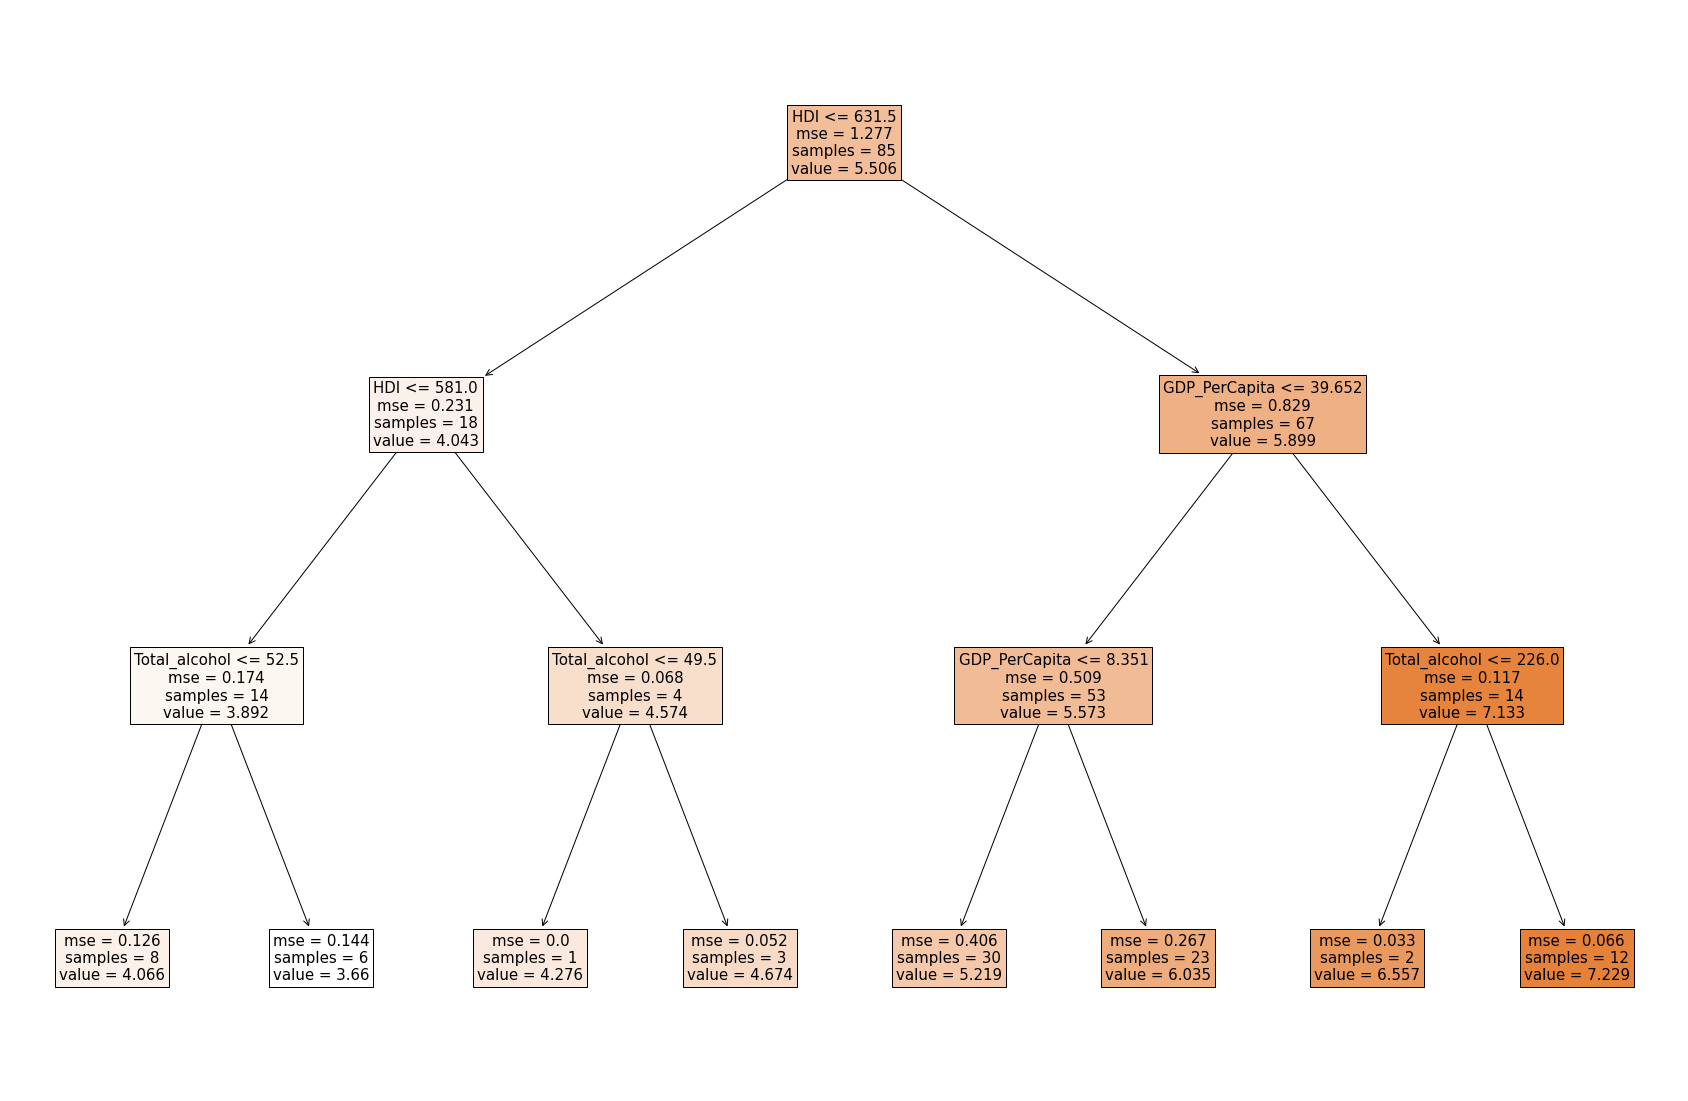

In [35]:
model = DecisionTreeRegressor(max_depth=3,random_state=42)
model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,X_test.columns,size=(30,20))

Because the mse is very low it can be concluded that the features we have chosen reliably predict the level of happiness measured in each country and that there is indeed a direct relationship between these features and the level of happiness. 

In [36]:
display(HTML("<img src='https://www.rt-ltd.com/wp-content/uploads/2017/06/didyouknow-246x300.png'/>"))    

##### And a little for general knowledge, let's see where we're located 

In [37]:
groupH[groupH['Country']=='Israel']

,Country,HappinessScore,Total_alcohol
10,Israel,7.267,141


In [38]:
groupT[groupT['Country']=='Israel']

,Country,HappinessScore,Total_alcohol
83,Israel,7.267,141


And what makes Israelis rank so high in the global happiness rankings?
The reasons can be seen in the next article
[link to the article](https://www.ynet.co.il/articles/0,7340,L-4956142,00.html)